# CLASIFICADOR DE FLORES MEDIANTE IA

Sergi Díaz Castro / 1489852, Pol Fernandez de la Cruz / 1531031

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from random import randint
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score,recall_score

In [2]:
# Daisy = 0, Dandelion = 1, Tulip = 2, Rose = 3, Sunflower = 4
types = ['Daisy','Dandelion','Tulip','Rose','Sunflower','Muro','Arbol']
tp = [0,1,2,3,4,5,6]
DAISY_DIR='PHOTOS/Margarita'
DANDI_DIR='PHOTOS/DienteLeon'
TULIP_DIR='PHOTOS/Tulipanes'
ROSE_DIR='PHOTOS/Rosas'
SUNFLOWER_DIR='PHOTOS/Girasol'
MURO_DIR = 'PHOTOS/Muro'
ARBOL_DIR = 'PHOTOS/Arbol'
DIRS = [DAISY_DIR,DANDI_DIR,TULIP_DIR,ROSE_DIR,SUNFLOWER_DIR,MURO_DIR,ARBOL_DIR]
IMGS = []
test = []

In [3]:
for i in range(len(types)):
    for img in os.listdir(DIRS[i]):
        path = os.path.join(DIRS[i],img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        IMGS.append(np.array(img))
        test.append(tp[i])

In [4]:
X = np.array(IMGS)
X = X/255
test = np.array(test)
x_train,x_test,y_train,y_test=train_test_split(X,test,test_size=0.25)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.array(x_train)
y_train = np.array(y_train)

### Aqui a sota carreguem els models y mostrem les grafiques, el proces de creacio y entrenament del model comença después de les grafiques.

In [42]:
a = load_model('my_model_ep20_b32.h5')
b = load_model('my_model_ep15_b32.h5')
c = load_model('my_model_ep10_b32.h5')
d = load_model('my_model_ep5_b32.h5')
e = load_model('my_model_ep20_b64.h5')
f = load_model('my_model_ep15_b64.h5')
g = load_model('my_model_ep10_b64.h5')
h = load_model('my_model_ep5_b64.h5')
i = load_model('my_model_ep20_b128.h5')
j = load_model('my_model_ep15_b128.h5')
k = load_model('my_model_ep10_b128.h5')
l = load_model('my_model_ep5_b128.h5')

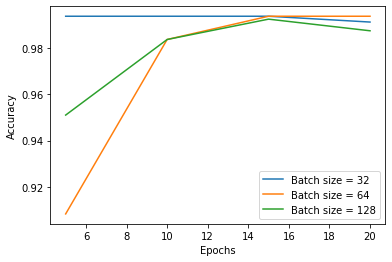

In [45]:
plt.plot([5,10,15,20],[accuracy_score(np.argmax(d.predict(x_test),axis=1),y_test),accuracy_score(np.argmax(c.predict(x_test),axis=1),y_test)
         ,accuracy_score(np.argmax(b.predict(x_test),axis=1),y_test),accuracy_score(np.argmax(a.predict(x_test),axis=1),y_test)])
plt.plot([5,10,15,20],[accuracy_score(np.argmax(h.predict(x_test),axis=1),y_test),accuracy_score(np.argmax(g.predict(x_test),axis=1),y_test)
         ,accuracy_score(np.argmax(f.predict(x_test),axis=1),y_test),accuracy_score(np.argmax(e.predict(x_test),axis=1),y_test)])
plt.plot([5,10,15,20],[accuracy_score(np.argmax(l.predict(x_test),axis=1),y_test),accuracy_score(np.argmax(k.predict(x_test),axis=1),y_test)
         ,accuracy_score(np.argmax(j.predict(x_test),axis=1),y_test),accuracy_score(np.argmax(i.predict(x_test),axis=1),y_test)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Batch size = 32","Batch size = 64","Batch size = 128"])
plt.show()

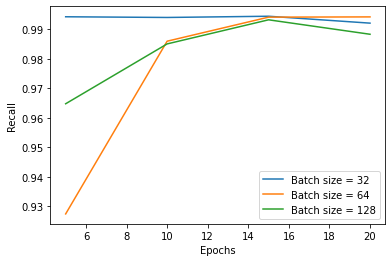

In [43]:
plt.plot([5,10,15,20],[recall_score(np.argmax(d.predict(x_test),axis=1),y_test,average='macro'),recall_score(np.argmax(c.predict(x_test),axis=1),y_test,average='macro')
         ,recall_score(np.argmax(b.predict(x_test),axis=1),y_test,average='macro'),recall_score(np.argmax(a.predict(x_test),axis=1),y_test,average='macro')])
plt.plot([5,10,15,20],[recall_score(np.argmax(h.predict(x_test),axis=1),y_test,average='macro'),recall_score(np.argmax(g.predict(x_test),axis=1),y_test,average='macro')
         ,recall_score(np.argmax(f.predict(x_test),axis=1),y_test,average='macro'),recall_score(np.argmax(e.predict(x_test),axis=1),y_test,average='macro')])
plt.plot([5,10,15,20],[recall_score(np.argmax(l.predict(x_test),axis=1),y_test,average='macro'),recall_score(np.argmax(k.predict(x_test),axis=1),y_test,average='macro')
         ,recall_score(np.argmax(j.predict(x_test),axis=1),y_test,average='macro'),recall_score(np.argmax(i.predict(x_test),axis=1),y_test,average='macro')])
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend(["Batch size = 32","Batch size = 64","Batch size = 128"])
plt.show()

In [5]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(7, activation = "softmax"))

In [6]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=False)

datagen.fit(x_train)

In [7]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

### A partir d'aqui realitzem l'entrenament, guardem els models y visuailtzem les grafiques al final de tot.

In [9]:
batch_size=64
epochs=15

model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/15
37/37 [==============================] - 82s 2s/step - loss: 1.4273 - accuracy: 0.4374 - val_loss: 0.7806 - val_accuracy: 0.7236
Epoch 2/15
37/37 [==============================] - 67s 2s/step - loss: 0.7507 - accuracy: 0.7335 - val_loss: 0.5859 - val_accuracy: 0.7626
Epoch 3/15
37/37 [==============================] - 65s 2s/step - loss: 0.5103 - accuracy: 0.8252 - val_loss: 0.2219 - val_accuracy: 0.9435
Epoch 4/15
37/37 [==============================] - 68s 2s/step - loss: 0.3443 - accuracy: 0.8889 - val_loss: 0.1321 - val_accuracy: 0.9611
Epoch 5/15
37/37 [==============================] - 69s 2s/step - loss: 0.2460 - accuracy: 0.9247 - val_loss: 0.1375 - val_accuracy: 0.9548
Epoch 6/15
37/37 [==============================] - 69s 2s/step - loss: 0.1552 - accuracy: 0.9570 - val_loss: 0.2128 - val_accuracy: 0.9447
Epoch 7/15
37/37 [==============================] - 69s 2s/step - loss: 0.1510 - accuracy: 0.9587 - val_loss: 0.0548 - val_accuracy: 0.9862
Epoch 8/15
37/37 [==

In [11]:
model.save('my_model_ep15_b64.h5')
pred = model.predict(x_test)
accuracy_score(np.argmax(pred,axis=1),y_test)

0.9937185929648241

In [12]:
model2 = Sequential()
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(7, activation = "softmax"))
model2.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=64
epochs=20
model2.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model2.save('my_model_ep20_b64.h5')
pred = model2.predict(x_test)
accuracy_score(np.argmax(pred,axis=1),y_test)

Epoch 1/20
37/37 [==============================] - 61s 2s/step - loss: 1.5336 - accuracy: 0.3956 - val_loss: 0.8543 - val_accuracy: 0.7249
Epoch 2/20
37/37 [==============================] - 61s 2s/step - loss: 0.7965 - accuracy: 0.6987 - val_loss: 0.4683 - val_accuracy: 0.8417
Epoch 3/20
37/37 [==============================] - 61s 2s/step - loss: 0.4237 - accuracy: 0.8554 - val_loss: 0.3946 - val_accuracy: 0.8518
Epoch 4/20
37/37 [==============================] - 61s 2s/step - loss: 0.2901 - accuracy: 0.9027 - val_loss: 0.1705 - val_accuracy: 0.9435
Epoch 5/20
37/37 [==============================] - 61s 2s/step - loss: 0.2555 - accuracy: 0.9212 - val_loss: 0.1691 - val_accuracy: 0.9535
Epoch 6/20
37/37 [==============================] - 61s 2s/step - loss: 0.2185 - accuracy: 0.9350 - val_loss: 0.1401 - val_accuracy: 0.9648
Epoch 7/20
37/37 [==============================] - 63s 2s/step - loss: 0.1559 - accuracy: 0.9539 - val_loss: 0.0875 - val_accuracy: 0.9799
Epoch 8/20
37/37 [==

0.9937185929648241

In [13]:
model3 = Sequential()
model3.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dense(7, activation = "softmax"))
model3.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=64
epochs=10
prueba = datagen.flow(x_train,y_train, batch_size=batch_size)
model3.fit(prueba, epochs = epochs, validation_data = (x_test,y_test),
            verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model3.save('my_model_ep10_b64.h5')
pred = model3.predict(x_test)
accuracy_score(np.argmax(pred,axis=1),y_test)

Epoch 1/10
37/37 [==============================] - 70s 2s/step - loss: 1.4118 - accuracy: 0.4309 - val_loss: 0.7595 - val_accuracy: 0.7462
Epoch 2/10
37/37 [==============================] - 67s 2s/step - loss: 0.6169 - accuracy: 0.7656 - val_loss: 0.2900 - val_accuracy: 0.9108
Epoch 3/10
37/37 [==============================] - 67s 2s/step - loss: 0.3470 - accuracy: 0.8769 - val_loss: 0.1335 - val_accuracy: 0.9648
Epoch 4/10
37/37 [==============================] - 66s 2s/step - loss: 0.2632 - accuracy: 0.9165 - val_loss: 0.1600 - val_accuracy: 0.9573
Epoch 5/10
37/37 [==============================] - 70s 2s/step - loss: 0.2688 - accuracy: 0.9199 - val_loss: 0.1786 - val_accuracy: 0.9598
Epoch 6/10
37/37 [==============================] - 68s 2s/step - loss: 0.2285 - accuracy: 0.9354 - val_loss: 0.0732 - val_accuracy: 0.9849
Epoch 7/10
37/37 [==============================] - 66s 2s/step - loss: 0.1745 - accuracy: 0.9449 - val_loss: 0.0415 - val_accuracy: 0.9899
Epoch 8/10
37/37 [==

0.9836683417085427

In [14]:
model4 = Sequential()
model4.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model4.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model4.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dense(7, activation = "softmax"))
model4.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=64
epochs=5
model4.fit(prueba, epochs = epochs, validation_data = (x_test,y_test),
            verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model4.save('my_model_ep5_b64.h5')
pred = model4.predict(x_test)
accuracy_score(np.argmax(model4.predict(x_test),axis=1),y_test)

Epoch 1/5
37/37 [==============================] - 68s 2s/step - loss: 1.3261 - accuracy: 0.4808 - val_loss: 0.7777 - val_accuracy: 0.7023
Epoch 2/5
37/37 [==============================] - 66s 2s/step - loss: 0.7054 - accuracy: 0.7292 - val_loss: 0.5695 - val_accuracy: 0.7877
Epoch 3/5
37/37 [==============================] - 66s 2s/step - loss: 0.3802 - accuracy: 0.8726 - val_loss: 0.1433 - val_accuracy: 0.9497
Epoch 4/5
37/37 [==============================] - 67s 2s/step - loss: 0.2179 - accuracy: 0.9251 - val_loss: 0.1095 - val_accuracy: 0.9686
Epoch 5/5
37/37 [==============================] - 66s 2s/step - loss: 0.2504 - accuracy: 0.9225 - val_loss: 0.2333 - val_accuracy: 0.9083


0.9082914572864321

In [23]:
model5 = Sequential()
model5.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model5.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model5.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model5.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model5.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model5.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model5.add(Flatten())
model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(Dense(7, activation = "softmax"))
model5.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=20 
model5.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model5.save('my_model_ep20_b32.h5')

Epoch 1/20
74/74 [==============================] - 69s 885ms/step - loss: 1.3231 - accuracy: 0.4709 - val_loss: 0.6483 - val_accuracy: 0.7739
Epoch 2/20
74/74 [==============================] - 66s 896ms/step - loss: 0.5976 - accuracy: 0.7868 - val_loss: 0.2610 - val_accuracy: 0.9372
Epoch 3/20
74/74 [==============================] - 66s 887ms/step - loss: 0.4066 - accuracy: 0.8722 - val_loss: 0.1772 - val_accuracy: 0.9460
Epoch 4/20
74/74 [==============================] - 63s 845ms/step - loss: 0.2154 - accuracy: 0.9346 - val_loss: 0.0914 - val_accuracy: 0.9774
Epoch 5/20
74/74 [==============================] - 71s 952ms/step - loss: 0.1925 - accuracy: 0.9379 - val_loss: 0.0616 - val_accuracy: 0.9862
Epoch 6/20
74/74 [==============================] - 71s 951ms/step - loss: 0.1824 - accuracy: 0.9452 - val_loss: 0.0410 - val_accuracy: 0.9937
Epoch 7/20
74/74 [==============================] - 69s 929ms/step - loss: 0.1658 - accuracy: 0.9546 - val_loss: 0.0877 - val_accuracy: 0.9749

In [24]:
model6 = Sequential()
model6.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model6.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model6.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model6.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model6.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model6.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model6.add(Flatten())
model6.add(Dense(512))
model6.add(Activation('relu'))
model6.add(Dense(7, activation = "softmax"))
model6.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=15 
model6.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model6.save('my_model_ep15_b32.h5')

Epoch 1/15
74/74 [==============================] - 81s 1s/step - loss: 1.1616 - accuracy: 0.5529 - val_loss: 0.5223 - val_accuracy: 0.8103
Epoch 2/15
74/74 [==============================] - 76s 1s/step - loss: 0.5103 - accuracy: 0.8119 - val_loss: 0.2311 - val_accuracy: 0.9133
Epoch 3/15
74/74 [==============================] - 76s 1s/step - loss: 0.4720 - accuracy: 0.8399 - val_loss: 0.5792 - val_accuracy: 0.8279
Epoch 4/15
74/74 [==============================] - 75s 1s/step - loss: 0.2562 - accuracy: 0.9108 - val_loss: 0.1151 - val_accuracy: 0.9774
Epoch 5/15
74/74 [==============================] - 75s 1s/step - loss: 0.2886 - accuracy: 0.9002 - val_loss: 0.2590 - val_accuracy: 0.9510
Epoch 6/15
74/74 [==============================] - 75s 1s/step - loss: 0.2106 - accuracy: 0.9312 - val_loss: 0.1287 - val_accuracy: 0.9761
Epoch 7/15
74/74 [==============================] - 78s 1s/step - loss: 0.1615 - accuracy: 0.9571 - val_loss: 0.1046 - val_accuracy: 0.9698
Epoch 8/15
74/74 [==

In [26]:
model7 = Sequential()
model7.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model7.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model7.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model7.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model7.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model7.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model7.add(Flatten())
model7.add(Dense(512))
model7.add(Activation('relu'))
model7.add(Dense(7, activation = "softmax"))
model7.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=10 
model7.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model7.save('my_model_ep10_b32.h5')

Epoch 1/10
74/74 [==============================] - 74s 996ms/step - loss: 1.2111 - accuracy: 0.5134 - val_loss: 0.5515 - val_accuracy: 0.8593
Epoch 2/10
74/74 [==============================] - 63s 846ms/step - loss: 0.4851 - accuracy: 0.8272 - val_loss: 0.2270 - val_accuracy: 0.9221
Epoch 3/10
74/74 [==============================] - 63s 843ms/step - loss: 0.3112 - accuracy: 0.9066 - val_loss: 0.1616 - val_accuracy: 0.9636
Epoch 4/10
74/74 [==============================] - 68s 917ms/step - loss: 0.1660 - accuracy: 0.9495 - val_loss: 0.3276 - val_accuracy: 0.8957
Epoch 5/10
74/74 [==============================] - 68s 916ms/step - loss: 0.2279 - accuracy: 0.9265 - val_loss: 0.1264 - val_accuracy: 0.9698
Epoch 6/10
74/74 [==============================] - 69s 925ms/step - loss: 0.1258 - accuracy: 0.9601 - val_loss: 0.1110 - val_accuracy: 0.9724
Epoch 7/10
74/74 [==============================] - 69s 924ms/step - loss: 0.2110 - accuracy: 0.9393 - val_loss: 0.0609 - val_accuracy: 0.9824

In [25]:
model8 = Sequential()
model8.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model8.add(MaxPooling2D(pool_size=(2,2)))
model8.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model8.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model8.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model8.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model8.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model8.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model8.add(Flatten())
model8.add(Dense(512))
model8.add(Activation('relu'))
model8.add(Dense(7, activation = "softmax"))
model8.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=5 
model8.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model8.save('my_model_ep5_b32.h5')

Epoch 1/5
74/74 [==============================] - 79s 1s/step - loss: 1.2823 - accuracy: 0.4807 - val_loss: 0.6535 - val_accuracy: 0.7839
Epoch 2/5
74/74 [==============================] - 70s 937ms/step - loss: 0.5207 - accuracy: 0.8301 - val_loss: 0.4999 - val_accuracy: 0.8894
Epoch 3/5
74/74 [==============================] - 69s 936ms/step - loss: 0.3948 - accuracy: 0.8705 - val_loss: 0.1417 - val_accuracy: 0.9548
Epoch 4/5
74/74 [==============================] - 69s 930ms/step - loss: 0.1967 - accuracy: 0.9439 - val_loss: 0.0445 - val_accuracy: 0.9887
Epoch 5/5
74/74 [==============================] - 70s 945ms/step - loss: 0.1413 - accuracy: 0.9597 - val_loss: 0.0448 - val_accuracy: 0.9937


In [27]:
model9 = Sequential()
model9.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model9.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model9.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model9.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model9.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model9.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model9.add(Flatten())
model9.add(Dense(512))
model9.add(Activation('relu'))
model9.add(Dense(7, activation = "softmax"))
model9.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=128
epochs=20 
model9.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model9.save('my_model_ep20_b128.h5')

Epoch 1/20
18/18 [==============================] - 64s 3s/step - loss: 1.6880 - accuracy: 0.3073 - val_loss: 1.1173 - val_accuracy: 0.5628
Epoch 2/20
18/18 [==============================] - 61s 3s/step - loss: 1.1054 - accuracy: 0.5533 - val_loss: 0.7861 - val_accuracy: 0.6784
Epoch 3/20
18/18 [==============================] - 64s 4s/step - loss: 0.7141 - accuracy: 0.7247 - val_loss: 0.5650 - val_accuracy: 0.7915
Epoch 4/20
18/18 [==============================] - 64s 4s/step - loss: 0.4346 - accuracy: 0.8429 - val_loss: 0.4097 - val_accuracy: 0.8807
Epoch 5/20
18/18 [==============================] - 66s 4s/step - loss: 0.3036 - accuracy: 0.9000 - val_loss: 0.1937 - val_accuracy: 0.9309
Epoch 6/20
18/18 [==============================] - 67s 4s/step - loss: 0.2598 - accuracy: 0.9084 - val_loss: 0.1231 - val_accuracy: 0.9673
Epoch 7/20
18/18 [==============================] - 68s 4s/step - loss: 0.1997 - accuracy: 0.9407 - val_loss: 0.4007 - val_accuracy: 0.8668
Epoch 8/20
18/18 [==

In [28]:
model10 = Sequential()
model10.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model10.add(MaxPooling2D(pool_size=(2,2)))
model10.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model10.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model10.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model10.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model10.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model10.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model10.add(Flatten())
model10.add(Dense(512))
model10.add(Activation('relu'))
model10.add(Dense(7, activation = "softmax"))
model10.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=128
epochs=15 
model10.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model10.save('my_model_ep15_b128.h5')

Epoch 1/15
18/18 [==============================] - 82s 5s/step - loss: 1.6142 - accuracy: 0.3307 - val_loss: 1.0021 - val_accuracy: 0.5754
Epoch 2/15
18/18 [==============================] - 68s 4s/step - loss: 0.8998 - accuracy: 0.6503 - val_loss: 0.5147 - val_accuracy: 0.8229
Epoch 3/15
18/18 [==============================] - 71s 4s/step - loss: 0.5595 - accuracy: 0.7942 - val_loss: 0.4086 - val_accuracy: 0.8618
Epoch 4/15
18/18 [==============================] - 69s 4s/step - loss: 0.3594 - accuracy: 0.8871 - val_loss: 0.1562 - val_accuracy: 0.9661
Epoch 5/15
18/18 [==============================] - 70s 4s/step - loss: 0.2336 - accuracy: 0.9243 - val_loss: 0.1092 - val_accuracy: 0.9686
Epoch 6/15
18/18 [==============================] - 70s 4s/step - loss: 0.1929 - accuracy: 0.9486 - val_loss: 0.5604 - val_accuracy: 0.8643
Epoch 7/15
18/18 [==============================] - 74s 4s/step - loss: 0.2807 - accuracy: 0.9150 - val_loss: 0.1619 - val_accuracy: 0.9322
Epoch 8/15
18/18 [==

In [33]:
model11 = Sequential()
model11.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model11.add(MaxPooling2D(pool_size=(2,2)))
model11.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model11.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model11.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model11.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model11.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model11.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model11.add(Flatten())
model11.add(Dense(512))
model11.add(Activation('relu'))
model11.add(Dense(7, activation = "softmax"))
model11.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=128
epochs=10 
model11.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model11.save('my_model_ep10_b128.h5')

Epoch 1/10
18/18 [==============================] - 91s 4s/step - loss: 1.5599 - accuracy: 0.3683 - val_loss: 0.7580 - val_accuracy: 0.6935
Epoch 2/10
18/18 [==============================] - 67s 4s/step - loss: 0.7711 - accuracy: 0.7092 - val_loss: 0.5496 - val_accuracy: 0.8015
Epoch 3/10
18/18 [==============================] - 65s 4s/step - loss: 0.4459 - accuracy: 0.8451 - val_loss: 0.2075 - val_accuracy: 0.9435
Epoch 4/10
18/18 [==============================] - 65s 4s/step - loss: 0.3236 - accuracy: 0.8915 - val_loss: 0.2123 - val_accuracy: 0.9271
Epoch 5/10
18/18 [==============================] - 67s 4s/step - loss: 0.2730 - accuracy: 0.9123 - val_loss: 0.1985 - val_accuracy: 0.9196
Epoch 6/10
18/18 [==============================] - 65s 4s/step - loss: 0.2581 - accuracy: 0.9203 - val_loss: 0.2597 - val_accuracy: 0.9146
Epoch 7/10
18/18 [==============================] - 64s 4s/step - loss: 0.1603 - accuracy: 0.9566 - val_loss: 0.1502 - val_accuracy: 0.9472
Epoch 8/10
18/18 [==

In [30]:
model12 = Sequential()
model12.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model12.add(MaxPooling2D(pool_size=(2,2)))
model12.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model12.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model12.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model12.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model12.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model12.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model12.add(Flatten())
model12.add(Dense(512))
model12.add(Activation('relu'))
model12.add(Dense(7, activation = "softmax"))
model12.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=128
epochs=5 
model12.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model12.save('my_model_ep5_b128.h5')

Epoch 1/5
18/18 [==============================] - 74s 4s/step - loss: 1.4980 - accuracy: 0.4015 - val_loss: 0.7743 - val_accuracy: 0.7324
Epoch 2/5
18/18 [==============================] - 73s 4s/step - loss: 0.7859 - accuracy: 0.7061 - val_loss: 0.5808 - val_accuracy: 0.8015
Epoch 3/5
18/18 [==============================] - 75s 4s/step - loss: 0.5288 - accuracy: 0.8035 - val_loss: 0.2686 - val_accuracy: 0.9133
Epoch 4/5
18/18 [==============================] - 73s 4s/step - loss: 0.3540 - accuracy: 0.8800 - val_loss: 0.1516 - val_accuracy: 0.9686
Epoch 5/5
18/18 [==============================] - 72s 4s/step - loss: 0.2530 - accuracy: 0.9199 - val_loss: 0.1965 - val_accuracy: 0.9510


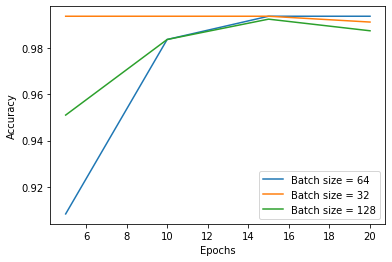

In [41]:
plt.plot([5,10,15,20],[accuracy_score(np.argmax(model4.predict(x_test),axis=1),y_test),accuracy_score(np.argmax(model3.predict(x_test),axis=1),y_test)
         ,accuracy_score(np.argmax(model.predict(x_test),axis=1),y_test),accuracy_score(np.argmax(model2.predict(x_test),axis=1),y_test)])
plt.plot([5,10,15,20],[accuracy_score(np.argmax(model8.predict(x_test),axis=1),y_test),accuracy_score(np.argmax(model7.predict(x_test),axis=1),y_test)
         ,accuracy_score(np.argmax(model6.predict(x_test),axis=1),y_test),accuracy_score(np.argmax(model5.predict(x_test),axis=1),y_test)])
plt.plot([5,10,15,20],[accuracy_score(np.argmax(model12.predict(x_test),axis=1),y_test),accuracy_score(np.argmax(model11.predict(x_test),axis=1),y_test)
         ,accuracy_score(np.argmax(model10.predict(x_test),axis=1),y_test),accuracy_score(np.argmax(model9.predict(x_test),axis=1),y_test)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Batch size = 64","Batch size = 32","Batch size = 128"])
plt.show()

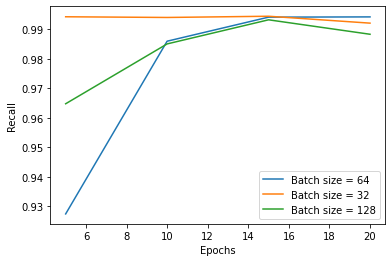

In [40]:
plt.plot([5,10,15,20],[recall_score(np.argmax(model4.predict(x_test),axis=1),y_test,average='macro'),recall_score(np.argmax(model3.predict(x_test),axis=1),y_test,average='macro')
         ,recall_score(np.argmax(model.predict(x_test),axis=1),y_test,average='macro'),recall_score(np.argmax(model2.predict(x_test),axis=1),y_test,average='macro')])
plt.plot([5,10,15,20],[recall_score(np.argmax(model8.predict(x_test),axis=1),y_test,average='macro'),recall_score(np.argmax(model7.predict(x_test),axis=1),y_test,average='macro')
         ,recall_score(np.argmax(model6.predict(x_test),axis=1),y_test,average='macro'),recall_score(np.argmax(model5.predict(x_test),axis=1),y_test,average='macro')])
plt.plot([5,10,15,20],[recall_score(np.argmax(model12.predict(x_test),axis=1),y_test,average='macro'),recall_score(np.argmax(model11.predict(x_test),axis=1),y_test,average='macro')
         ,recall_score(np.argmax(model10.predict(x_test),axis=1),y_test,average='macro'),recall_score(np.argmax(model9.predict(x_test),axis=1),y_test,average='macro')])
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend(["Batch size = 64","Batch size = 32","Batch size = 128"])
plt.show()